### REGRESSION USING NEURAL NETWORK

**IMPORTING THE DATA AND PACKAGES**

In [ ]:
#import a dataset
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("C:/Users/DRIPTO20/Desktop/insurance.csv")

In [2]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**NORMALISING THE DATA**

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer((MinMaxScaler(),["age", "bmi", "children"]),(OneHotEncoder(),["sex","smoker", "region"]))

#create X and Y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [15]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [16]:
print(X_train.loc[0],"---", X_train_normal[0])

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object --- [0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ]


In [17]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [18]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [23]:
#building a model
tf.random.set_seed(42)
insurance_m = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

insurance_m.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

#fit
his = insurance_m.fit(X_train_normal, y_train, epochs = 200, verbose = 0)

In [24]:
theloss, themae = insurance_m.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3168.3450 - mae: 3168.3450


**LOSS x EPOCHS VERIFICATION**

Text(0, 0.5, 'loss')

<Figure size 432x432 with 0 Axes>

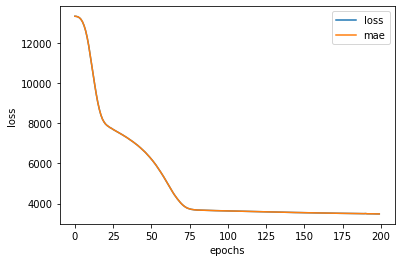

In [27]:
plt.figure(figsize=(6,6))
pd.DataFrame(his.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [29]:
# import numpy as n
# ep = n.arange(0,201,25)
# losslist = []
# for e in ep:
#     losslist.append(insurance_m.evaluate(X_test_normal, y_test))

# plt.xlabel("epochs")
# plt.ylabel("loss")
# plt.plot(ep, losslist)